In [ ]:
!python -m pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 

In [ ]:
import prophet as Prophet 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_pedestrians_covid.csv')
df.head()

,ds,y
0,2017-06-02,39230
1,2017-06-03,35290
2,2017-06-04,27083
3,2017-06-05,28727
4,2017-06-06,30315


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      1490 non-null   object
 1   y       1490 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [ ]:
#df 

In [ ]:
m = Prophet.Prophet(weekly_seasonality= True)

In [ ]:
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpymfhclyt/xdivqdyw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpymfhclyt/clr_owda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21735', 'data', 'file=/tmp/tmpymfhclyt/xdivqdyw.json', 'init=/tmp/tmpymfhclyt/clr_owda.json', 'output', 'file=/tmp/tmpymfhclyt/prophet_model625tj73y/prophet_model-20221108053817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:38:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:38:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1850,2022-06-26
1851,2022-06-27
1852,2022-06-28
1853,2022-06-29
1854,2022-06-30


In [ ]:
forecast = m.predict(future) # thios will predict the future result (depend upon the period which we have passed )
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1850,2022-06-26,37211.565822,24402.921368,49186.444478
1851,2022-06-27,38775.553471,26078.443616,50366.117471
1852,2022-06-28,39564.468113,27306.753035,51612.395709
1853,2022-06-29,40853.389455,28560.308987,53030.185097
1854,2022-06-30,41983.725985,29577.887368,53856.114887


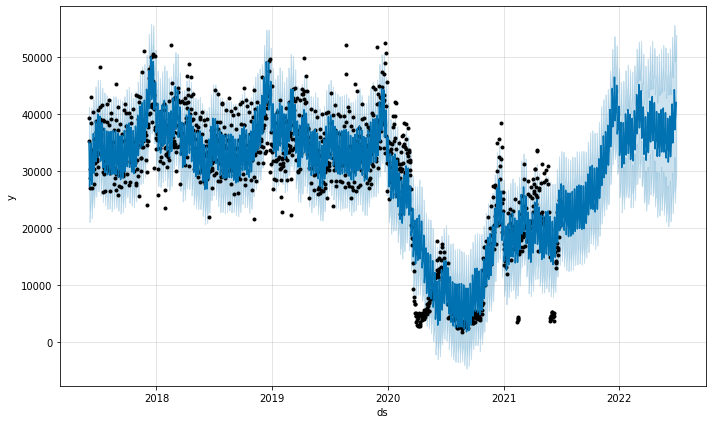

In [ ]:
graph = m.plot(forecast)

In [ ]:
future1 = m.make_future_dataframe(periods=180)
future1.tail()

,ds
1665,2021-12-23
1666,2021-12-24
1667,2021-12-25
1668,2021-12-26
1669,2021-12-27


In [ ]:
forecast1 = m.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1665,2021-12-23,41859.945328,35275.683202,49027.913125
1666,2021-12-24,45002.348788,38131.693578,51959.273078
1667,2021-12-25,42714.897665,35818.017140,49961.819469
1668,2021-12-26,36469.072962,29714.905985,43786.597903
1669,2021-12-27,37275.967239,29793.537027,44152.594677


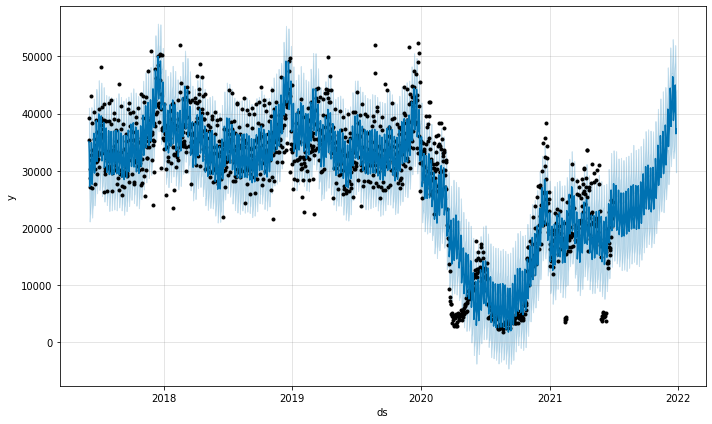

In [ ]:
graph1 = m.plot(forecast1)

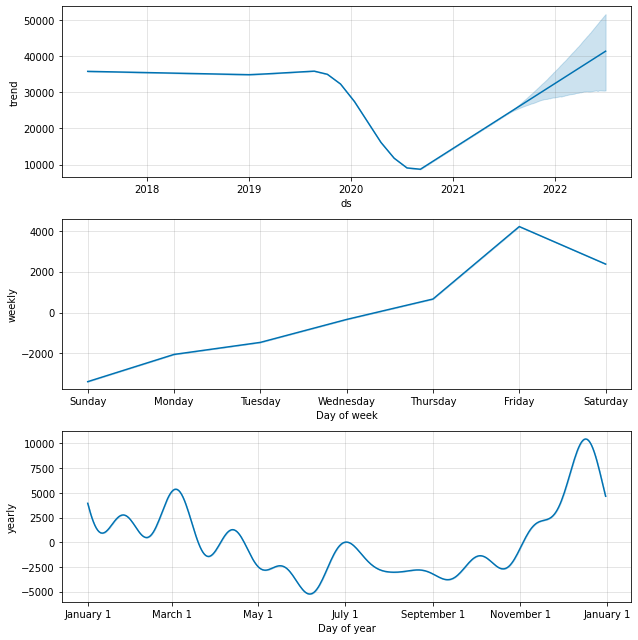

In [ ]:
plotting = m.plot_components(forecast)

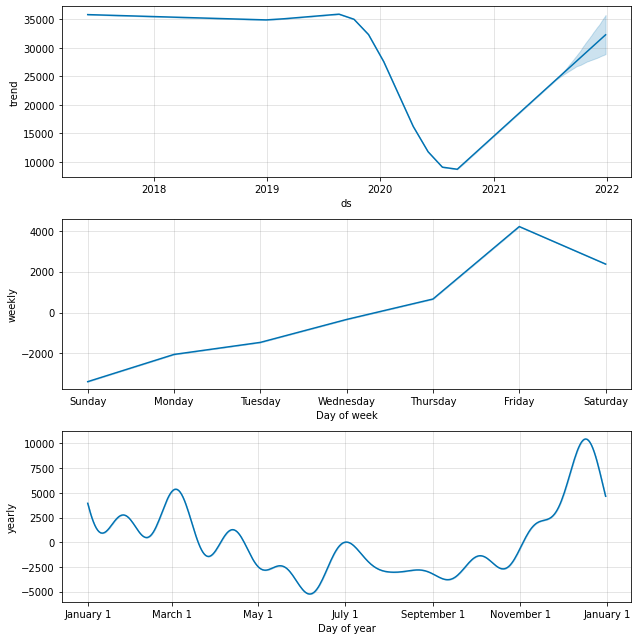

In [ ]:
plotting1 = m.plot_components(forecast1)

parameters that we are setting 

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast1)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast1)